In [29]:
from tensorflow import keras
import os
import keras_segmentation.pretrained
from keras_segmentation.pretrained import pspnet_101_cityscapes
from keras_segmentation.models.pspnet import pspnet_101

new_model = pspnet_101(  n_classes=7)
new_model.load_weights('trained_model.hdf5')


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 2s 2s/step


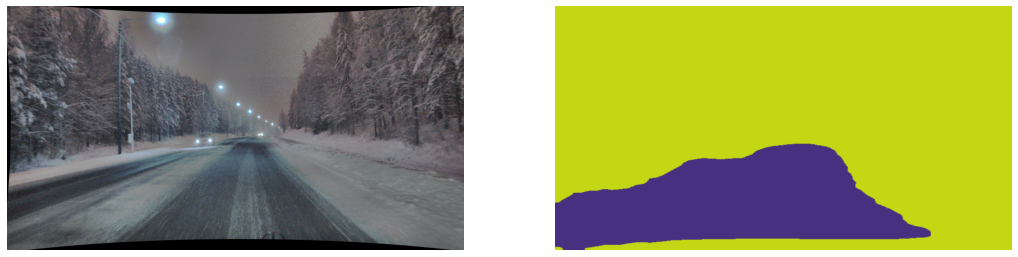

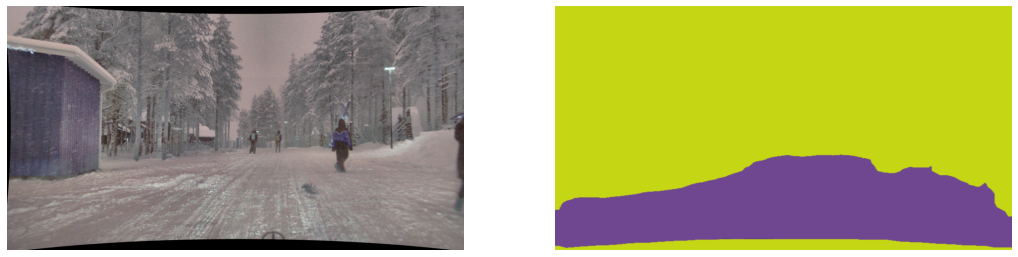

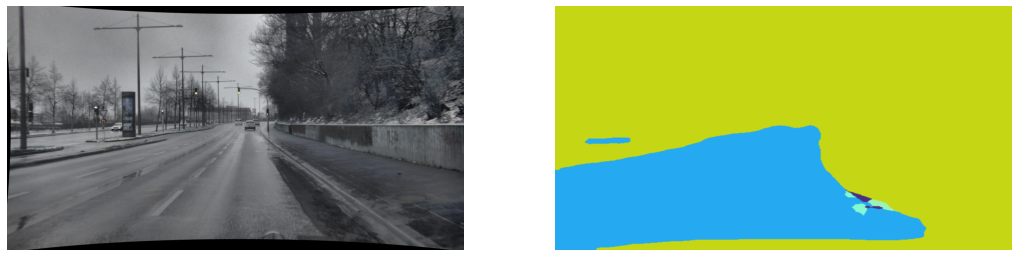

In [50]:
import os
import cv2
import matplotlib.pyplot as plt

# Gör en mapp med alla bilder som ska annoteras, döp den till "imageData/" 
# Gör en till mapp där de annoterade bilderna ska hamna, döp den till "imageData_annotated/"
# Båda mapparna ska ligga i GitHub mappen "Design-Project-MPSYS"
for filename in os.listdir("imageData/"): 
    out = new_model.predict_segmentation(
        inp="imageData/"+filename,
        out_fname="imageData_annotated/"+filename
    )
    img1 = cv2.imread("imageData/"+filename)
    img2 = cv2.imread("imageData_annotated/"+filename)

    fig, ax = plt.subplots(1, 2, figsize=(18, 18))
    ax[0].imshow(img1)
    ax[1].imshow(img2)
    [axi.set_axis_off() for axi in ax.ravel()];
    